In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.colors as colors
import pandas as pd
from pandas.core.common import flatten
import scipy
import time
from ripser import ripser
import tadasets
from persim import plot_diagrams
# from ggplot import *

In /home/harryem/anaconda3/envs/bats_p37/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/harryem/anaconda3/envs/bats_p37/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/harryem/anaconda3/envs/bats_p37/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/harryem/anaconda3/envs/bats_p37/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.


In [7]:
from cocycleIndividualPlot import cocycleIndividualPlot

In [22]:
cocycles_ind_plot = cocycleIndividualPlot(vcf_file='/home/projects/HimalGenAsia/HimalGen.phase.vcf.gz')
cocycles_ind_plot.vcf_file
cocycles_ind_plot.preprocess()

In [25]:

gt_matrix = cocycles_ind_plot.gt_matrix
gt_matrix.shape

(119875, 5496)

In [26]:
# Normalize gt_matrix by site
gt_matrix_norm = gt_matrix - np.mean(gt_matrix,axis=1)[:, np.newaxis]

In [27]:
gt_matrix_norm.shape

(119875, 5496)

In [ ]:
start = time.time()
u, s, vh = np.linalg.svd(gt_matrix_norm.T, full_matrices=False)
print('SVD took {} secs'.format(time.time() - start))

In [ ]:
gt_matrix_PCs = np.diag(s) @ vh
gt_matrix_PCs.shape

# ripser_individuals

This notebook looks at the points furthest from the diagonal in the rips complex, takes the individuals which make them up, collects them by cluster, and compares the PC diagrams labelled by either in / not in cluster.

In [3]:
gt_matrix_PCs = np.load('/home/harryem/data/HimalGen/gt_matrix_PCs.npy').T.astype(float)
labels_pop = pd.read_csv('~/../projects/HimalGenAsia/HimalGen.popinfo.csv',sep=',')

## Manhattan distance matrix

In [4]:
D_Full_Man = np.load('/home/harryem/data/HimalGen/D_Full_Man.npy')
D_Full_Man = scipy.spatial.distance.squareform(D_Full_Man)

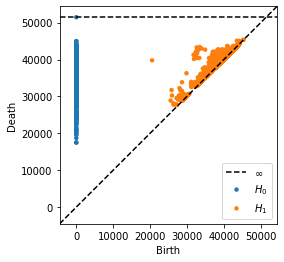

Time: 116.2 seconds


In [5]:
start = time.time()
result_manhattan = ripser(D_Full_Man, coeff=2, maxdim=1, do_cocycles=True, distance_matrix=True)
diagrams = result_manhattan['dgms']
plot_diagrams(diagrams, show=True)

print("Time: {:.1f} seconds".format(time.time() - start))

# GT matrix PCs

/home/harryem/anaconda3/envs/bats_p37/lib/python3.7/site-packages/ripser/ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


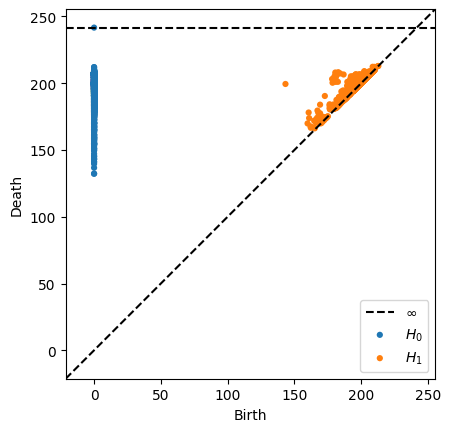

Time: 124.0 seconds


In [7]:
# PCA
start = time.time()
result_gt_pcs = ripser(gt_matrix_PCs, coeff=2, maxdim=1, do_cocycles=True)
diagrams = result_gt_pcs['dgms']
plot_diagrams(diagrams, show=True)

print("Time: {:.1f} seconds".format(time.time() - start))

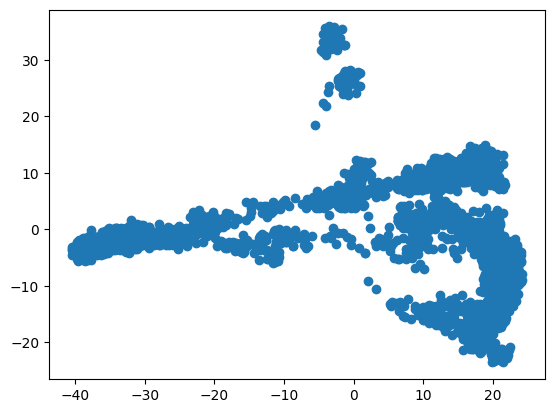

In [8]:
# gt_matrix_PCs = np.load('/home/harryem/data/HimalGen/gt_matrix_PCs.npy').T.astype(float)

plt.scatter(gt_matrix_PCs[:,0], gt_matrix_PCs[:,1])
plt.show()

In [12]:
dgm1 = diagrams[1]
ordered_cocycles = np.argsort(dgm1[:, 1] - dgm1[:, 0])[::-1]
# idx = np.argmax(dgm1[:, 1] - dgm1[:, 0])
cocycle_number = 0
idx=ordered_cocycles[cocycle_number]
cocycles = result_gt_pcs['cocycles']
D = result_gt_pcs['dperm2all']
cocycle = cocycles[1][idx]

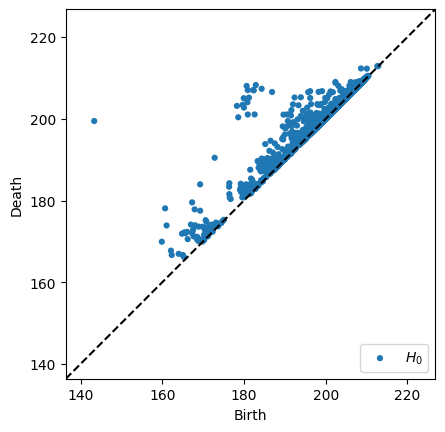

In [13]:
plot_diagrams(diagrams[1], show=True)

In [9]:
cocycles_ind_plot = cocycleIndividualPlot(popinfo_path='~/../projects/HimalGenAsia/HimalGen.popinfo.csv',
                                          gt_matrix_PCs=gt_matrix_PCs,
                                          result=result_manhattan)
cocycles_ind_plot

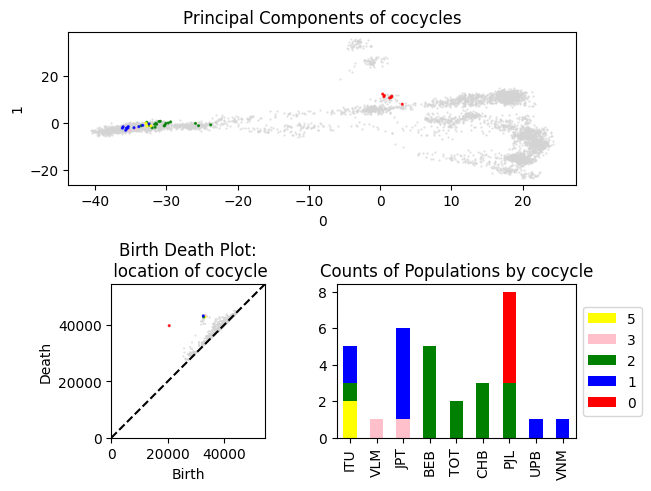

In [23]:
fig = cocycles_ind_plot.display_cocycle_charts(cocycle_number_list=[0,1,2,3,5],
                                               cocycle_individuals_file='results/cocycle_individuals.txt',
                                               birth_death_coordinates_file='results/birth_death_coordinates_file.txt')
fig.show()

In [ ]:
from ripserIndividualPlots import display_cocycle_charts

cocycle_number_list = [4]
# cocycle_number_list = [0,1,2,3,5]
popinfo_path = '~/../projects/HimalGenAsia/HimalGen.popinfo.csv'
colordict = {
    -1: 'lightgrey',
    0: 'red',
    1: 'blue',
    2: 'green',
    3: 'pink',
    4: 'black',
    5: 'yellow',
    6: 'lightblue'
}

fig = display_cocycle_charts(cocycle_number_list, gt_matrix_PCs, colordict, result_manhattan)
fig.suptitle('Population Breakdown of Most Persistant Cocycles for Manhattan Distance', fontsize=13)

fig.show()

In [17]:
# save to svg
fig.savefig("Manhattan_Distance_individuals_plots.svg", format="svg")

In [19]:
fig = display_cocycle_charts(cocycle_number_list, gt_matrix_PCs, colordict, result_gt_pcs)
fig.suptitle('Population Breakdown of Most Persistant Cocycles for All Principal Components', fontsize=13)

fig.show()

NameError: name 'result_gt_pcs' is not defined

In [13]:
# save to svg
fig.savefig("gt_matrix_PCs_individuals_plots.svg", format="svg")